In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#data = pd.read_csv('OilProduction.txt', sep="\t", engine='python', encoding="cp949")
data = pd.read_csv('OilProduction.txt', sep="\t", engine='python', encoding="cp949", header=1)

In [4]:
data.head()

,1880,30
0,1890,77
1,1900,149
2,1905,215
3,1910,328
4,1915,432


In [5]:
X = data.iloc[:, 0] # year
X = X.values.reshape(-1, 1)
X

array([[1890],
       [1900],
       [1905],
       [1910],
       [1915],
       [1920],
       [1925],
       [1930],
       [1935],
       [1940],
       [1945],
       [1950],
       [1955],
       [1960],
       [1962],
       [1964],
       [1966],
       [1968],
       [1970],
       [1972],
       [1974],
       [1976],
       [1978],
       [1980],
       [1982],
       [1984]], dtype=int64)

In [6]:
y = data.iloc[:, 1] #Mbbl
y = y.values.reshape(-1, 1)
y

array([[   77],
       [  149],
       [  215],
       [  328],
       [  432],
       [  689],
       [ 1069],
       [ 1412],
       [ 1655],
       [ 2150],
       [ 2595],
       [ 3803],
       [ 5626],
       [ 7674],
       [ 8882],
       [10310],
       [12016],
       [14104],
       [16690],
       [18584],
       [20389],
       [20188],
       [21922],
       [21732],
       [19403],
       [19608]], dtype=int64)

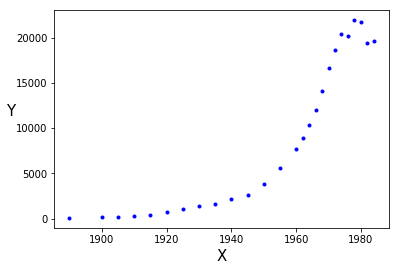

In [7]:
plt.plot(X,y,"b.")
plt.ylabel("Y", fontsize=15,rotation=0)
plt.xlabel("X", fontsize=15)
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[1890]
[1.8900e+03 3.5721e+06]


In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([17618702.97777436]), array([[-1.84168924e+04,  4.81262144e+00]]))

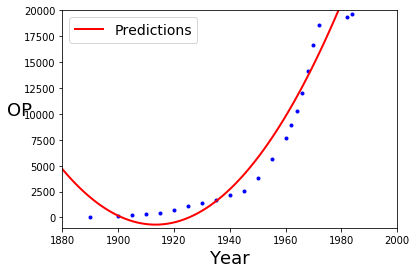

In [10]:
X_new=np.linspace(1880, 1990, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("Year", fontsize=18)
plt.ylabel("OP", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1880, 2000, -1000, 20000])
plt.show()

In [12]:
x = [50000.,  100000.,  150000.,  200000.,  250000.,  300000.,
    350000.,  400000.,  450000.,  500000.,  550000.,  600000.,
    650000.,  700000.,  750000.,  800000.,  850000.,  900000.,
    950000., 1000000.]
y = [1.87792730e-06, 3.81015841e-07, 1.89900422e-07, 1.21302069e-07,
   8.39703240e-08, 6.18937868e-08, 4.98975718e-08, 3.97720839e-08,
   3.23420144e-08, 2.79493666e-08, 2.35548293e-08, 2.01505953e-08,
   1.81079429e-08, 1.59391671e-08, 1.37227044e-08, 1.30031234e-08,
   1.19076952e-08, 1.10967303e-08, 9.43339053e-09, 8.98627485e-09] 

In [13]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt 
def f(x, a, b, c): 
    return a*np.exp(b*x)+c
curve_fit(f, x, y, p0=[np.min(y), -1, np.min(y)])
 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 8.98627485e-09, -1.00000000e+00,  1.50593655e-07]),
 array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

Parameters: [ 9.33311312e+00 -5.70168835e+06  1.49569657e+00]
RMSE: 1.2672196845074618e-09
R-squared: 0.9999911187269674



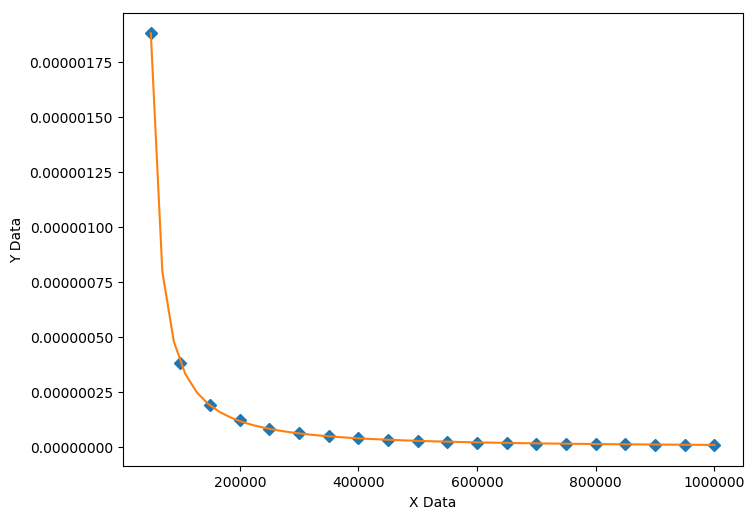

In [14]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xData = numpy.array([50000.0, 100000.0, 150000.0, 200000.0, 250000.0, 300000.0, 350000.0, 400000.0, 450000.0, 500000.0, 550000.0, 600000.0, 650000.0, 700000.0, 750000.0, 800000.0, 850000.0, 900000.0, 950000.0, 1000000.0])
yData = numpy.array([1.8779273e-06, 3.81015841e-07, 1.89900422e-07, 1.21302069e-07, 8.3970324e-08, 6.18937868e-08, 4.98975718e-08, 3.97720839e-08, 3.23420144e-08, 2.79493666e-08, 2.35548293e-08, 2.01505953e-08, 1.81079429e-08, 1.59391671e-08, 1.37227044e-08, 1.30031234e-08, 1.19076952e-08, 1.10967303e-08, 9.43339053e-09, 8.98627485e-09])
def func(x, a, b, c): # from zunzun.com equation search
    return a / (b+numpy.power(x, c))
# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])
# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
modelPredictions = func(xData, *fittedParameters) 
absError = modelPredictions - yData
SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
print()
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)
    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')
    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)
    # now the model as a line plot
    axes.plot(xModel, yModel)
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.show()
    plt.close('all') # clean up after using pyplot
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
 

Parameters: [ 9.33311312e+00 -5.70168835e+06  1.49569657e+00]
RMSE: 1.2672196845074618e-09
R-squared: 0.9999911187269674



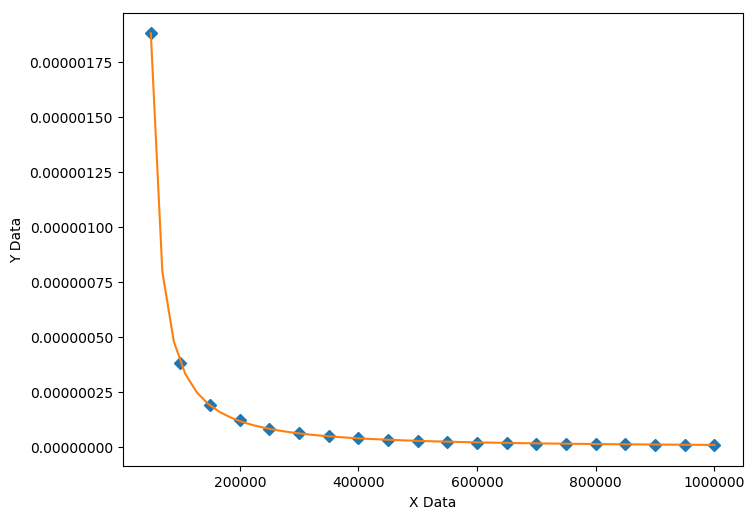

In [44]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xData = numpy.array([50000.0, 100000.0, 150000.0, 200000.0, 250000.0, 300000.0, 350000.0, 400000.0, 450000.0, 500000.0, 550000.0, 600000.0, 650000.0, 700000.0, 750000.0, 800000.0, 850000.0, 900000.0, 950000.0, 1000000.0])
yData = numpy.array([1.8779273e-06, 3.81015841e-07, 1.89900422e-07, 1.21302069e-07, 8.3970324e-08, 6.18937868e-08, 4.98975718e-08, 3.97720839e-08, 3.23420144e-08, 2.79493666e-08, 2.35548293e-08, 2.01505953e-08, 1.81079429e-08, 1.59391671e-08, 1.37227044e-08, 1.30031234e-08, 1.19076952e-08, 1.10967303e-08, 9.43339053e-09, 8.98627485e-09])

# xData = numpy.array([1890, 1900, 1905, 1910, 1915, 1920, 1925, 1930.0, 1935.0, 1940.0, 1945.0, 1950.0, 1955.0, 1960.0, 1962.0, 1964.0, 1966.0, 1968.0, 1970.0, 1972.0])
# yData = numpy.array([1.8779273e-06, 3.81015841e-07, 1.89900422e-07, 1.21302069e-07, 8.3970324e-08, 6.18937868e-08, 4.98975718e-08, 3.97720839e-08, 3.23420144e-08, 2.79493666e-08, 2.35548293e-08, 2.01505953e-08, 1.81079429e-08, 1.59391671e-08, 1.37227044e-08, 1.30031234e-08, 1.19076952e-08, 1.10967303e-08, 9.43339053e-09, 8.98627485e-09])

# xData = numpy.array([1890.0, 1900.0, 1905.0, 1910.0, 1915.0, 1920.0, 1925.0, 1930.0, 1935.0, 1940.0, 550000.0, 600000.0, 650000.0, 700000.0, 750000.0, 800000.0, 850000.0, 900000.0, 950000.0, 1000000.0])
# yData = numpy.array([77, 149, 215, 328, 432, 689, 1069, 3.97720839e-08, 3.23420144e-08, 2.79493666e-08, 2.35548293e-08, 2.01505953e-08, 1.81079429e-08, 1.59391671e-08, 1.37227044e-08, 1.30031234e-08, 1.19076952e-08, 1.10967303e-08, 9.43339053e-09, 8.98627485e-09])

"""
xData = np.array([[1890.0], [1900.0], [1905.0], [1910.0], [1915.0],[1920],[1925],[1930],[1935],[1940],[1945],[1950],[1955],[1960],[1962],[1964],
       [1966],[1968],[1970],[1972],[1974],[1976],[1978],[1980],[1982],[1984]])
yData = np.array([[   77.0],[  149],[  215],[  328],[  432],[  689],[ 1069],[ 1412],[ 1655],[ 2150],[ 2595],[ 3803],[ 5626],[ 7674],[ 8882],
       [10310],[12016],[14104],[16690],[18584],[20389],[20188],[21922],[21732],[19403],[19608]])
"""

def func(x, a, b, c): # from zunzun.com equation search
    return a / (b+numpy.power(x, c))
# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])
# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
print()
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)
    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')
    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)
    # now the model as a line plot
    axes.plot(xModel, yModel)
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.show()
    plt.close('all') # clean up after using pyplot
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
 

[2.e+04 2.e+00 2.e+03 3.e+00 3.e-01]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


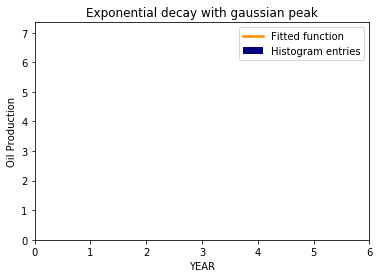

<Figure size 432x288 with 0 Axes>

In [29]:
# 1.) Necessary imports.    
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2.) Define fit function.
def fit_function(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x/beta) + B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

# 3.) Generate exponential and gaussian data and histograms.
# data = np.random.exponential(scale=2.0, size=100000)
# data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)
data = np.array([[1890],
       [1900],
       [1905],
       [1910],
       [1915],
       [1920],
       [1925],
       [1930],
       [1935],
       [1940],
       [1945],
       [1950],
       [1955],
       [1960],
       [1962],
       [1964],
       [1966],
       [1968],
       [1970],
       [1972],
       [1974],
       [1976],
       [1978],
       [1980],
       [1982],
       [1984]])
data2 = np.array([[   77],
       [  149],
       [  215],
       [  328],
       [  432],
       [  689],
       [ 1069],
       [ 1412],
       [ 1655],
       [ 2150],
       [ 2595],
       [ 3803],
       [ 5626],
       [ 7674],
       [ 8882],
       [10310],
       [12016],
       [14104],
       [16690],
       [18584],
       [20389],
       [20188],
       [21922],
       [21732],
       [19403],
       [19608]])

bins = np.linspace(1880, 2000, 10)
data_entries_1, bins_1 = np.histogram(data, bins=bins)
data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 4.) Add histograms of exponential and gaussian data.
data_entries = data_entries_1 + data_entries_2
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# 5.) Fit the function to the histogram data.
popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])
print(popt)

# 6.)
# Generate enough x values to make the curves look smooth.
xspace = np.linspace(1880, 2000, 10)

# Plot the histogram and the fitted function.
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

# Make the plot nicer.
plt.xlim(0,6)
plt.xlabel(r'YEAR')
plt.ylabel(r'Oil Production')
plt.title(r'Exponential decay with gaussian peak')
plt.legend(loc='best')
plt.show()
plt.clf()